# Final Test

**Problem 1 (34 Points)**. A palindrome is a string that is spelled the same way forard and backward. Some examples of palindromes are 'radar', 'able was i ere i saw elba' and 'a man a plan a canal panama'. Write a recursive test_palindrome function that returns ```True``` if the string stored in an array is a palindrome and ```False``` otherwise. The function should ignore spaces and punctuation in the string.

***Problem 2 (33 Points)***  As you know, ```TextBlob``` language translation works by connecting to Google Translate. Determine the range of languages Google Translate recognizes. Write a script that translates the English word "Peace" into each of the supported languages. Display the translations in the same size text in a circular word cloud.

***Problem 3 (33 Points)*** When searching for tweets, you can include :) and :( to lok for positive and negative tweets, respectively. Perform searches for 10 positive tweets and 10 negative tweets, then use TextBlob sentiment analysis to confirm that each is positive or negative

In [1]:
import re

from textblob import Word, TextBlob
from operator import itemgetter
from nltk.corpus import stopwords
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import imageio
stop_words = stopwords.words('english')
import os 
import nltk

# 1.)
 A palindrome is a string that is spelled the same way forard and backward. Some examples of palindromes are 'radar', 'able was i ere i saw elba' and 'a man a plan a canal panama'. Write a recursive test_palindrome function that returns True if the string stored in an array is a palindrome and False otherwise. The function should ignore spaces and punctuation in the string.

In [6]:
class Final:
    
    start = 0
    
    def cleanString(self, string):
        reg = "[^A-z]"
        regexp = re.compile(reg)
        return regexp.sub('', string)


    def paladin(self, string, i=start):
        if len(string) is 1:
            return True

        if string[i] is not string[len(string) - i - 1]:
            return False
        
        if i < len(string) - i:
            i += 1
            return self.paladin(string, i)
        
        return True

In [7]:
final = Final()
textString = final.cleanString("a12 a")

In [8]:
final.paladin(textString)

True

# 2.)
As you know, TextBlob language translation works by connecting to Google Translate. Determine the range of languages Google Translate recognizes. Write a script that translates the English word "Peace" into each of the supported languages. Display the translations in the same size text in a circular word cloud.

In [9]:
# language codes from https://developers.google.com/admin-sdk/directory/v1/languages

In [2]:
languages = ["am","ar","eu","bn","GB","BR","bg","ca","hr","hr","cs","da","nl","en","et","il","fi","fr","de","el","gu","iw","hi","hu","is","id","it","ja","kn","ko","lv","lt","ms","ml","mr","no","pl","PT","ro","ru","sr","CN","sk","sl","es","sw","sv","ta","te","th","TW","tr","ur","uk","vi","cy"]

In [3]:
blob = TextBlob(u"Peace")

In [5]:
translations = []
for language in languages:
    try:
        print(language, blob.translate(to=language))
        translations.append(blob.translate( to=language))
    except:
        print(language, "Same")
        # when the translation is the same as "Peace"
        pass

am ሰላም
ar سلام
eu Same
bn শান্তি
GB Same
BR Same
bg Спокойствие
ca Pau
hr Mir
hr Mir
cs Mír
da Fred
nl Vrede
en Same
et Rahu
il Same
fi rauha
fr Paix
de Frieden
el Ειρήνη
gu શાંતિ
iw שלום
hi शांति
hu Béke
is Friður
id Perdamaian
it Pace
ja 平和
kn ಶಾಂತಿ
ko 평화
lv Miers
lt Ramybė
ms Kedamaian
ml സമാധാനം
mr शांतता
no Fred
pl Pokój
PT Paz
ro Pace
ru мир
sr Мир
CN Same
sk mier
sl Mir
es Paz
sw Amani
sv Fred
ta சமாதானம்
te శాంతి
th สันติภาพ
TW Same
tr Barış
ur امن
uk Мир
vi Sự thanh bình
cy Heddwch


In [24]:
import multidict
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [19]:
mask_image = imageio.imread('final_circle.png')
wordcloud = WordCloud(font_path='FreeSerif-YO4a.otf',width=2000, height=2000, 
    colormap='prism', mask=mask_image, background_color='white')

In [20]:
strings = []
for blob in translations:
    strings.append(blob.string)

In [21]:
cloudText = ' '.join(set(strings))

In [27]:
getFrequencyDictForText(cloudText)

<MultiDict('heddwch': 1, 'സമാധാനം': 1, 'mir': 1, 'pokój': 1, 'ሰላም': 1, 'miers': 1, 'paix': 1, 'சமாதானம்': 1, 'શાંતિ': 1, 'শান্তি': 1, 'mír': 1, 'perdamaian': 1, 'paz': 1, 'ειρήνη': 1, 'pau': 1, 'спокойствие': 1, 'ಶಾಂತಿ': 1, 'amani': 1, 'frieden': 1, 'vrede': 1, 'สันติภาพ': 1, 'friður': 1, '平和': 1, 'barış': 1, '평화': 1, 'pace': 1, 'kedamaian': 1, 'शांतता': 1, 'שלום': 1, 'fred': 1, 'ramybė': 1, 'мир': 1, 'శాంతి': 1, 'शांति': 1, 'rahu': 1, 'mier': 1, 'امن': 1, 'سلام': 1, 'rauha': 1, 'béke': 1, 'sự': 1, 'thanh': 1, 'bình': 1)>

In [25]:
wordcloud = wordcloud.generate_from_frequencies(getFrequencyDictForText(cloudText))

### This is how the documentation has it but they have a ranking system so I don't think you can display words at the same size even though they have the same frequency

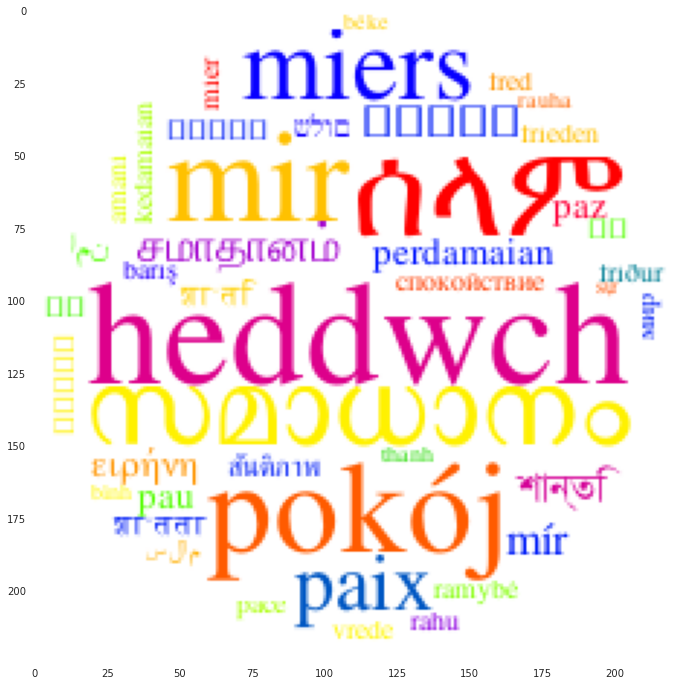

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

# 3.)
When searching for tweets, you can include :) and :( to lok for positive and negative tweets, respectively. Perform searches for 10 positive tweets and 10 negative tweets, then use TextBlob sentiment analysis to confirm that each is positive or negative

In [101]:
import pandas as pd
import tweepy
import keys
from tweetutilities import get_API
from locationlistener import LocationListener

In [102]:
auth = tweepy.OAuthHandler(keys.consumer_key,
                           keys.consumer_secret)
auth.set_access_token(keys.access_token,
                      keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [103]:
tweetsPositive = []
countsPositive = {'total_tweets': 0, 'locations': 0}
tweetsNegative = []
countsNegative = {'total_tweets': 0, 'locations': 0}

In [104]:
location_listener_positive = LocationListener(api, counts_dict=countsPositive, 
    tweets_list=tweetsPositive, topic='happy', limit=50)
location_listener_negative = LocationListener(api, counts_dict=countsNegative, 
    tweets_list=tweetsNegative, topic='sad', limit=50)

### Positive

In [105]:
streamPositive = tweepy.Stream(auth=api.auth, listener=location_listener_positive)

In [106]:
streamPositive.filter(track=['happy'], languages=['en'], is_async=False)

Miketyson2007: @emmadora Father of young daughter a few days between happy at home to hospital ..thinking he’s got over it ..day l… https://t.co/Mpb6MlPtLt

Tassin_Am: Just received my new colouring book and I am so happy, don’t know which one to choose tho 😆 https://t.co/ynhVcbkXn4

TheLionKing: Happy 18th anniversary to our North American Tour company! 🎉 Where have you seen THE LION KING in the US?… https://t.co/hIFMdpif30

colbyisyummy: happy #cassiemondays &amp; #yummymondays &lt;3 monday is now my favorite day of the week we get TWO videos i’m readyyy https://t.co/gHs1OERLpr

eliottdmry: SANDER HAPPY BIRTHDAY BABY

B18587307Eileen: @brooklyn_silzer Happy Birthday 🎊🎉🎁🎂🎈

alarrymama: @sleepingpixiee Happy Birthday to your gorgeous Momma!!!!🧁🎉🧁🎉🌻

reitufbaby: If this was my man, he is cancelled. I don’t care how happy he was here. Those facial expressions? Those body movem… https://t.co/BdMLfOcvWt

memphisbarker: bet there’s an elderly raver who hasn’t noticed — still by the speaker,

In [119]:
happyTweets = ["Happy Monday! Head over to IG to catch the new Monday Maintenance video",
              "this photo of us just popped up and made me so happy! Thank you, dear friend",
              "So happy my final spring semester of my senior year is over at Syracuse University",
              "Happy Birthday to one of the nicest human beings I've ever met @Kris27jam",
              "So happy to all of my students reading at home!",
              "love, thank you for making all of us happy. you are indeed the bestest boy ever",
              "Happy birthday to the mega talented and beautiful ⁦@MauraWest",
              "I am really very happy and impressed with the few African countries who’re contributing massively to combat this",
              "Feeling good and happy.",
              "ikr I’m just happy to go out and film"]

#### The polarities are all positive so these are positive tweets.

In [130]:
for tweet in happyTweets:
    blob = TextBlob(tweet)
    print(blob.sentiment)

Sentiment(polarity=0.5681818181818181, subjectivity=0.7272727272727273)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.55)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.65, subjectivity=0.8)
Sentiment(polarity=0.7833333333333333, subjectivity=0.9666666666666667)
Sentiment(polarity=0.36, subjectivity=0.62)
Sentiment(polarity=0.75, subjectivity=0.8)
Sentiment(polarity=0.8, subjectivity=1.0)


### Negative

In [107]:
streamNegative = tweepy.Stream(auth=api.auth, listener=location_listener_negative)

In [108]:
streamNegative.filter(track=['sad'], languages=['en'], is_async=False)

btsgfriend__: Watching other ggs doing well on charts make me feel sad toward crossroads and gfriend😭😭
Let's work hard together f… https://t.co/72LUtZU1se

TooRareMakayla: Quarantine has me sad because my 22Plus jeans are getting too tight. How’s your Monday going? 😂😭😂

sparklylarri: so i don’t know why i’m sad, i’m just sad. makes sense right?

TylerMPoetry: Such sad, sad news. What a profound loss. "Eviction" by Eavan Boland @NewYorker  https://t.co/M1rjPAessj

hcllyoaks: @virtueoaks it’s sad really

kuroigarnet: I was feeling really sad the other day and I remembered that I never knew how to do origami so.. I searched how to… https://t.co/u25fG6KVRJ

taehygist: i’m very sad right now.

GoBlue_TB: they dont even need to cheat. just makes it more sad if you ask me

ItscoolNai: Gahhh damn it seem like everybody breaking up these days it’s so sad to see 😓

Krzhizhanovskyy: @KrimsonRogue Aw damn. That’s sad. You should fr play though 😂

DynamoSZN: @yhhsdnudnkk I haven't read or tried fin

In [122]:
sadTweets = ["it’s only 11 and naeemah making me sad",
            "yes I’m sad",
            "It’s sad watching all my coworkers be at work",
            "So sad. People will be driven to financial ruin.",
            "I just lost TWO ENTIRE SONGS! Just gone from my hard drive. 2 full recorded songs, GONE. This is a sad day, very very sad",
            "Sad this documentary had to make everyone realize how much of a beast Dennis Rodman was",
            "so i don’t know why i’m sad, i’m just sad.",
            "Aw damn. That’s sad. You should fr play though",
            "It’s with a heavy heart we share the sad news of Sister Patricia Hanlon’s passing.",
            "Yup. A sad ass bitch"]

#### The polarities are all negative so these are negative tweets.

In [125]:
for tweet in sadTweets:
    blob = TextBlob(tweet)
    print(blob.sentiment)

Sentiment(polarity=-0.25, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=-0.21833333333333335, subjectivity=0.7433333333333334)
Sentiment(polarity=-0.09999999999999999, subjectivity=0.39999999999999997)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.35, subjectivity=0.75)
Sentiment(polarity=-0.5, subjectivity=1.0)
